1.	Deberás utilizar el archivo llamado bank_marketing.csv. con los datos de problema.
2.	Utilizar el archivo bank-names.txt para obtener información de cada una de las variables.
3.	Crear un proyecto tipo Jupyter Notebook en Google-Colab llamado Solucion_Reto_SC_63_<nombre_y_apellido_del_estudiante>.ipynb.
4.	Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.


In [15]:
from tqdm import tqdm
import time
from time import sleep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [4]:
data= pd.read_csv("/content/sample_data/0.xozu243mego0.145c4n51y90bbank_marketing_RETO_DS_AS.csv")

5.	Obtener la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en caso de que existan.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


6.	Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.

In [6]:
df=pd.DataFrame(data)
categorical_columns = ["job", "marital", "default", "housing", "loan", "contact", "poutcome", "y"]
encoder = OneHotEncoder(sparse_output=False, drop="if_binary")
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
le= LabelEncoder()
df_encoded["education"]= le.fit_transform(df_encoded["education"])
df_encoded["month"]= le.fit_transform(df_encoded["month"])

#print(f"Encoded Employee data : \n{df_encoded}")
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9000 non-null   int64  
 1   education          9000 non-null   int64  
 2   balance            9000 non-null   int64  
 3   day                9000 non-null   int64  
 4   month              9000 non-null   int64  
 5   duration           9000 non-null   int64  
 6   campaign           9000 non-null   int64  
 7   pdays              9000 non-null   int64  
 8   previous           9000 non-null   int64  
 9   job_admin.         9000 non-null   float64
 10  job_blue-collar    9000 non-null   float64
 11  job_entrepreneur   9000 non-null   float64
 12  job_housemaid      9000 non-null   float64
 13  job_management     9000 non-null   float64
 14  job_retired        9000 non-null   float64
 15  job_self-employed  9000 non-null   float64
 16  job_services       9000 

7.	Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.

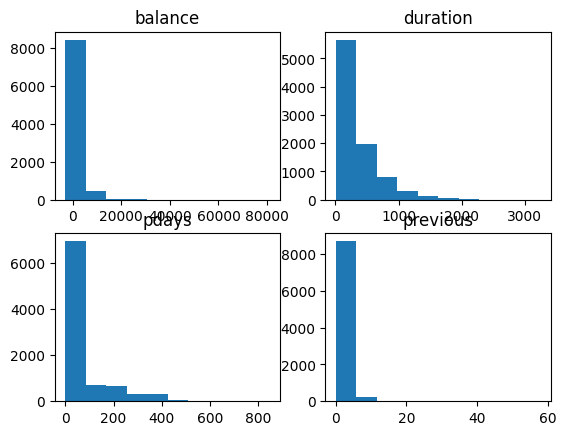

In [7]:
figure, axis = plt.subplots(2, 2)
axis[0, 0].hist(df_encoded["balance"])
axis[0,0].set_title("balance")

axis[0, 1].hist(df_encoded["duration"])
axis[0,1].set_title("duration")

axis[1, 0].hist(df_encoded["pdays"])
axis[1,0].set_title("pdays")

axis[1, 1].hist(df_encoded["previous"])
axis[1,1].set_title("previous")

plt.show()
# Transformar balance, duration, pdays, previous

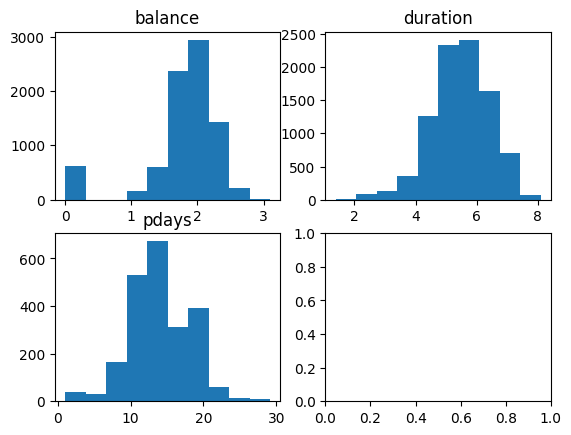

In [8]:
df_encoded["balance_transformed"] = np.power(df_encoded["balance"],0.1)
df_encoded["duration_transformed"] = np.log(df_encoded["duration"]+1)
df_encoded["pdays_transformed"] = np.power(df_encoded["pdays"],0.5)
#df_encoded["pdays_transformed"] = (df_encoded["pdays"] - df_encoded["pdays"].min()) / (df_encoded["pdays"].max() - df_encoded["pdays"].min())
figure, axis = plt.subplots(2, 2)
axis[0, 0].hist(df_encoded["balance_transformed"])
axis[0,0].set_title("balance")

axis[0, 1].hist(df_encoded["duration_transformed"])
axis[0,1].set_title("duration")

axis[1, 0].hist(df_encoded["pdays_transformed"])
axis[1,0].set_title("pdays")

plt.show()

In [9]:
df_encoded.fillna(0)

,age,education,balance,day,month,duration,campaign,pdays,previous,job_admin.,...,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_yes,balance_transformed,duration_transformed,pdays_transformed
0,31,2,2666,10,9,318,2,97,6,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.200828,5.765191,9.848858
1,29,3,1584,6,11,245,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.089178,5.505332,0.000000
2,41,1,2152,17,9,369,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.154191,5.913503,0.000000
3,50,1,84,17,5,18,8,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.557500,2.944439,0.000000
4,40,1,0,28,5,496,2,182,11,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,6.208590,13.490738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,42,1,314,16,8,269,2,-1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.777023,5.598422,0.000000
8996,32,1,491,8,8,223,2,-1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.858267,5.411646,0.000000
8997,44,1,2886,20,6,31,1,-1,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.218348,3.465736,0.000000
8998,57,0,491,15,0,1217,3,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.858267,7.104965,0.000000


8.	Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.
9.	Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.

In [10]:
df_encoded["balance_transformed"]=df_encoded["balance_transformed"].fillna(0)
df_encoded["pdays_transformed"]=df_encoded["pdays_transformed"].fillna(0)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   9000 non-null   int64  
 1   education             9000 non-null   int64  
 2   balance               9000 non-null   int64  
 3   day                   9000 non-null   int64  
 4   month                 9000 non-null   int64  
 5   duration              9000 non-null   int64  
 6   campaign              9000 non-null   int64  
 7   pdays                 9000 non-null   int64  
 8   previous              9000 non-null   int64  
 9   job_admin.            9000 non-null   float64
 10  job_blue-collar       9000 non-null   float64
 11  job_entrepreneur      9000 non-null   float64
 12  job_housemaid         9000 non-null   float64
 13  job_management        9000 non-null   float64
 14  job_retired           9000 non-null   float64
 15  job_self-employed    

In [12]:
X= df_encoded[['age',
 'education',
 'day',
 'month',
 'campaign',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'balance_transformed',
 'duration_transformed',
 'pdays_transformed']]
Y= df_encoded["y_yes"]

X=X.values
Y=Y.values
x_train, x_validation_and_test, y_train, Y_validation_and_test = train_test_split(X,Y, train_size=.6)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test,Y_validation_and_test, train_size=.5)

10.	Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.

In [20]:
parameters = {"C": [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3, 1, 5, 10], "penalty": ("l2", "elasticnet", "none"), "solver": ("newton-cg", "saga", "lbfgs", "sag")}
RL_grid = LogisticRegression(max_iter=10000)
modelo_RL_grid = GridSearchCV(RL_grid, parameters)
modelo_RL_grid.fit(x_train, np.ravel(y_train))
print(modelo_RL_grid)
print(f"Mejores parámetros {modelo_RL_grid.best_params_} con un score de {modelo_RL_grid.best_score_:0.2f}")
print (modelo_RL_grid.score(x_test, y_test))
print("Exactitud (accuracy) con el conjunto de Validación= ", modelo_RL_grid.best_score(x_validation, y_validation))
pr_grid= modelo_RL_grid.predict(x_validation)
print(confusion_matrix(y_validation, pr_grid))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
440 fits failed out of a total of 660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3, 1,
                               5, 10],
                         'penalty': ('l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'saga', 'lbfgs', 'sag')})
Mejores parámetros {'C': 0.28, 'penalty': 'l2', 'solver': 'sag'} con un score de 0.82
0.8094444444444444
Exactitud (accuracy) con el conjunto de Validación=  0.8022222222222222
[[863 170]
 [186 581]]


11.	Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.

In [ ]:
parameters_NN = {"hidden_layer_sizes": [(2,2), (2,5), (5,5), (10,10)], "solver": ("lbfgs", "sgd", "Adam"), "activation": ("logistic", "tanh", "relu"), "learning_rate" : ("constant", "adaptive")}
NN_grid = MLPClassifier(max_iter=10000)
modelo_NN_grid = GridSearchCV(NN_grid, parameters_NN)
modelo_NN_grid.fit(x_train, np.ravel(y_train))


In [37]:
print(f"Mejores parámetros {modelo_NN_grid.best_params_} con un score de {modelo_NN_grid.best_score_:0.2f}")
print("Exactitud (accuracy) con el conjunto de Validación= ", modelo_NN_grid.score(x_validation, y_validation))
pr_grid= modelo_NN_grid.predict(x_validation)
print(confusion_matrix(y_validation, pr_grid))

Mejores parámetros {'activation': 'logistic', 'hidden_layer_sizes': (5, 5), 'learning_rate': 'constant', 'solver': 'lbfgs'} con un score de 0.82
Exactitud (accuracy) con el conjunto de Validación=  0.8111111111111111
[[850 183]
 [157 610]]


12.	Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.
**Comentario:** Se comparan ambos resultados y el que se recomienda usar es la red neurona ya que tiene una mejor exactitud. La decisión depende de que tipo de errores se busca minimizar.

In [25]:
clf =LogisticRegression (C=0.28, penalty="l2", solver="sag", max_iter=10000)
modelo_RL = clf.fit(x_train, y_train)
print("Exactitud (accuracy) con el conjunto de prueba= ", modelo_RL.score(x_test, y_test))
pr= modelo_RL.predict(x_test)
print("Matriz de confusión: \n", confusion_matrix(y_test, pr))

Exactitud (accuracy) con el conjunto de prueba=  0.8094444444444444
Matriz de confusión: 
 [[868 160]
 [183 589]]


In [38]:
modelo_NN = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=10000, activation="logistic", learning_rate="constant", solver="lbfgs" )
modelo_NN.fit(x_train, y_train)
print("Exactitud (accuracy) con el conjunto de prueba= ", modelo_NN.score(x_test, y_test))
pr_NN= modelo_NN.predict(x_test)
print("Matriz de confusión: \n", confusion_matrix(y_test, pr_NN))

Exactitud (accuracy) con el conjunto de prueba=  0.815
Matriz de confusión: 
 [[847 181]
 [152 620]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
